In [7]:
import pandas as pd

import numpy as np

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel



from xgboost import plot_importance

from matplotlib import pyplot

import os


In [8]:
#>acc=0.910, est=0.851, cfg={'learning_rate': 0.01, 'n_estimators': 200}
#>acc=0.901, est=0.857, cfg={'learning_rate': 0.05, 'n_estimators': 100}
#>acc=0.925, est=0.842, cfg={'learning_rate': 0.01, 'n_estimators': 220}
n_tree=200
max_depth=8
learning_rate=0.01
model = XGBClassifier(max_depth=max_depth,learning_rate=learning_rate,n_estimators=n_tree,importance_type='gain')
#model=GradientBoostingClassifier(max_depth=8,learning_rate=0.05,n_estimators=250)

# My Train

In [9]:

pahtname=r'D:\DataSets\ML_LS\ML-Long_S50M15_07To2Q20-Train_Norm.csv'
#pahtname=r'D:\DataSets\ML_LS\ML-Long_S50M15_07To2Q20-Train.csv'

filepath= os.path.abspath(pahtname)

dataset =pd.read_csv(filepath,index_col="datetime", parse_dates=['datetime'],dayfirst=True)
dataset.drop(columns=['open','high','low','close'],inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70896 entries, 2007-01-03 09:45:00 to 2020-06-30 16:45:00
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indy_ma-550             70896 non-null  float64
 1   indy_ma-1100            70896 non-null  float64
 2   indy_hh-550             70896 non-null  float64
 3   indy_ll-550             70896 non-null  float64
 4   indy_mid-550            70896 non-null  float64
 5   indy_hh2-1100           70896 non-null  float64
 6   indy_ll2-1100           70896 non-null  float64
 7   indy_mid2-1100          70896 non-null  float64
 8   indy_macd110-440        70896 non-null  float64
 9   indy_signal110-440-110  70896 non-null  float64
 10  indy_hist_macd110-440   70896 non-null  float64
 11  indy_rsi25-ma20         70896 non-null  float64
 12  indy_6ATRTrail_DC-110   70896 non-null  float64
 13  cate_3trend-550_ma110   70896 non-null  int64  
 14  cat

In [10]:
def CreateData(dfx):
 labelCol=dfx.columns[len(dfx.columns)-1]
 
 X_df_temp = dfx.drop(columns=labelCol)
 Y_df_temp = dfx[labelCol]

 Xtemp=X_df_temp.to_numpy()
 ytemp=Y_df_temp.to_numpy()

 return X_df_temp,Y_df_temp, Xtemp,ytemp

In [11]:
manual_split=False

# My Train and Test

In [12]:
if manual_split==True:

 st='01-2007'
 ed='12-2018'
 df_train=dataset[st:ed]
 #df_train.info()
 X_df,Y_df,X_train,y_train=CreateData( df_train)

 print(X_df.info())
 
 st_test='01-2019'
 ed_test='12-2020'
 df_test=dataset[st_test:ed_test]
 XTest_df,YTest_df, X_test,y_test=CreateData( df_test)
 print(XTest_df.info())
    
else if manual_split==False:
 seed = 1992
#Using Split
 IsShuffle=False
 test_size = 0.3   
 
 Xdf,Ydf,X,y=CreateData(dataset)

 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=IsShuffle,random_state=seed)

 print(X_train.shape)

 print(X_test.shape)


# n_estimators=epoch

# evaluate_validation_set

# learning_curves with n_estimators(epoch) and plot 

In [14]:

#eval_set[0]=train and eval_set[1]=test 
eval_set = [(X_train, y_train), (X_test, y_test)]



#validation_0 for merror and validation_1 for mlogloss
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set,verbose=False)


# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
                                         


Accuracy: 82.50%


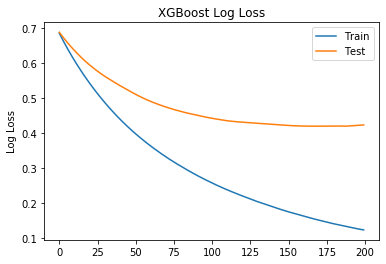

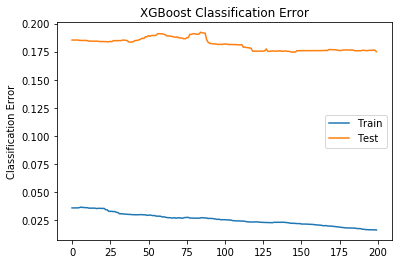

In [15]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()
